<h1 style="color: white; background-color: #3498db; font-family: 'Arial', sans-serif; text-align: center; padding: 10px; border-radius: 8px;">Airlines Customer Satisfaction SVM</h1>


# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import  plotly.express as px
import sklearn

In [2]:
df=pd.read_csv("D:\Class ml\Datasets\Invistico_Airline.csv")

# Data Exploration

In [5]:
df

,satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129875,satisfied,Female,disloyal Customer,29,Personal Travel,Eco,1731,5,5,5,...,2,2,3,3,4,4,4,2,0,0.0
129876,dissatisfied,Male,disloyal Customer,63,Personal Travel,Business,2087,2,3,2,...,1,3,2,3,3,1,2,1,174,172.0
129877,dissatisfied,Male,disloyal Customer,69,Personal Travel,Eco,2320,3,0,3,...,2,4,4,3,4,2,3,2,155,163.0
129878,dissatisfied,Male,disloyal Customer,66,Personal Travel,Eco,2450,3,2,3,...,2,3,3,2,3,2,1,2,193,205.0


In [6]:
print(f"The shape of the dataset  is :{df.shape}")
print(f"The size of the dataset  is :{df.size} \n")
print(f"The columns in the dataset is:{df.columns}")

The shape of the dataset  is :(129880, 23)
The size of the dataset  is :2987240 

The columns in the dataset is:Index(['satisfaction', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Seat comfort',
       'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
       'Inflight wifi service', 'Inflight entertainment', 'Online support',
       'Ease of Online booking', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',
       'Departure Delay in Minutes', 'Arrival Delay in Minutes'],
      dtype='object')


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Seat comfort                       129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Food and drink                     129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Inflight wifi service              1298

In [8]:
def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        duplicated=df.duplicated().sum()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,duplicated,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['columns','Data Types','No of Unique Values','No of Duplicated Rows','No of Null Values']
    return df_check 
check(df)

,columns,Data Types,No of Unique Values,No of Duplicated Rows,No of Null Values
0,satisfaction,object,2,0,0
1,Gender,object,2,0,0
2,Customer Type,object,2,0,0
3,Age,int64,75,0,0
4,Type of Travel,object,2,0,0
5,Class,object,3,0,0
6,Flight Distance,int64,5398,0,0
7,Seat comfort,int64,6,0,0
8,Departure/Arrival time convenient,int64,6,0,0
9,Food and drink,int64,6,0,0


# Data Cleaning

In [9]:
total_null_values = df.isnull().sum().sum()

if total_null_values > 0:
    print(f"There are {total_null_values} null values in the dataset.")
else:
    print("There are no null values in the dataset.")


There are 393 null values in the dataset.


In [10]:
if df.duplicated().any()>0:
    print(f"The number of duplicated rows in the datasets are {df.duplicated().sum()}")
else:
    print(f'There are no duplicated rows in the dataset')

There are no duplicated rows in the dataset


In [11]:
df.dropna(inplace=True)

In [12]:
num_df=df.select_dtypes(exclude=["object"])
cat_df=df.select_dtypes(include=["object"])

# Data Analysis

In [13]:
# summary statistics on numerical data
num_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,129487.0,39.428761,15.117597,7.0,27.0,40.0,51.0,85.0
Flight Distance,129487.0,1981.008974,1026.884131,50.0,1359.0,1924.0,2543.0,6951.0
Seat comfort,129487.0,2.838586,1.392873,0.0,2.0,3.0,4.0,5.0
Departure/Arrival time convenient,129487.0,2.990277,1.527183,0.0,2.0,3.0,4.0,5.0
Food and drink,129487.0,2.852024,1.443587,0.0,2.0,3.0,4.0,5.0
Gate location,129487.0,2.990377,1.305917,0.0,2.0,3.0,4.0,5.0
Inflight wifi service,129487.0,3.249160,1.318765,0.0,2.0,3.0,4.0,5.0
Inflight entertainment,129487.0,3.383745,1.345959,0.0,2.0,4.0,4.0,5.0
Online support,129487.0,3.519967,1.306326,0.0,3.0,4.0,5.0,5.0
Ease of Online booking,129487.0,3.472171,1.305573,0.0,2.0,4.0,5.0,5.0


In [14]:
cat_df.describe().T

,count,unique,top,freq
satisfaction,129487,2,satisfied,70882
Gender,129487,2,Female,65703
Customer Type,129487,2,Loyal Customer,105773
Type of Travel,129487,2,Business travel,89445
Class,129487,3,Business,61990


In [15]:
num_df.corr()

,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
Age,1.000000,-0.249438,0.008475,0.038905,0.015496,-0.000805,0.014037,0.130254,0.121287,0.071728,0.066510,0.083684,-0.015554,0.031556,-0.018605,0.037948,-0.009263,-0.011248
Flight Distance,-0.249438,1.000000,-0.042476,0.001381,-0.004806,-0.002322,0.012314,-0.027344,-0.031860,-0.022326,-0.032422,-0.030220,0.019653,0.002531,0.009391,0.009674,0.111608,0.110103
Seat comfort,0.008475,-0.042476,1.000000,0.434945,0.716008,0.405358,0.129152,0.426488,0.120153,0.211576,0.121183,0.136161,0.118557,0.041265,0.108681,0.130365,-0.023842,-0.025506
Departure/Arrival time convenient,0.038905,0.001381,0.434945,1.000000,0.527575,0.544311,-0.001558,0.077262,-0.000470,0.001853,0.060104,0.029416,0.067201,0.062927,0.067021,-0.000495,0.004197,0.002599
Food and drink,0.015496,-0.004806,0.716008,0.527575,1.000000,0.523530,0.026077,0.367777,0.028503,0.041150,0.038578,0.073975,0.036307,0.011912,0.033313,0.013620,-0.013375,-0.014881
Gate location,-0.000805,-0.002322,0.405358,0.544311,0.523530,1.000000,-0.003949,-0.000430,0.002679,0.001365,-0.025346,-0.007462,-0.000345,-0.031809,-0.001789,-0.003141,0.003997,0.003640
Inflight wifi service,0.014037,0.012314,0.129152,-0.001558,0.026077,-0.003949,1.000000,0.253941,0.557548,0.601074,0.060854,0.033636,0.038339,0.092402,0.038513,0.631800,-0.033010,-0.035270
Inflight entertainment,0.130254,-0.027344,0.426488,0.077262,0.367777,-0.000430,0.253941,1.000000,0.441844,0.321891,0.184083,0.160616,0.117286,0.224130,0.109420,0.355692,-0.030325,-0.033321
Online support,0.121287,-0.031860,0.120153,-0.000470,0.028503,0.002679,0.557548,0.441844,1.000000,0.617642,0.158006,0.138258,0.102399,0.206641,0.095773,0.669886,-0.033694,-0.036087
Ease of Online booking,0.071728,-0.022326,0.211576,0.001853,0.041150,0.001365,0.601074,0.321891,0.617642,1.000000,0.436439,0.355274,0.398457,0.137896,0.418073,0.684329,-0.036647,-0.039806


Text(0.5, 1.0, 'Correlation Heatmap')

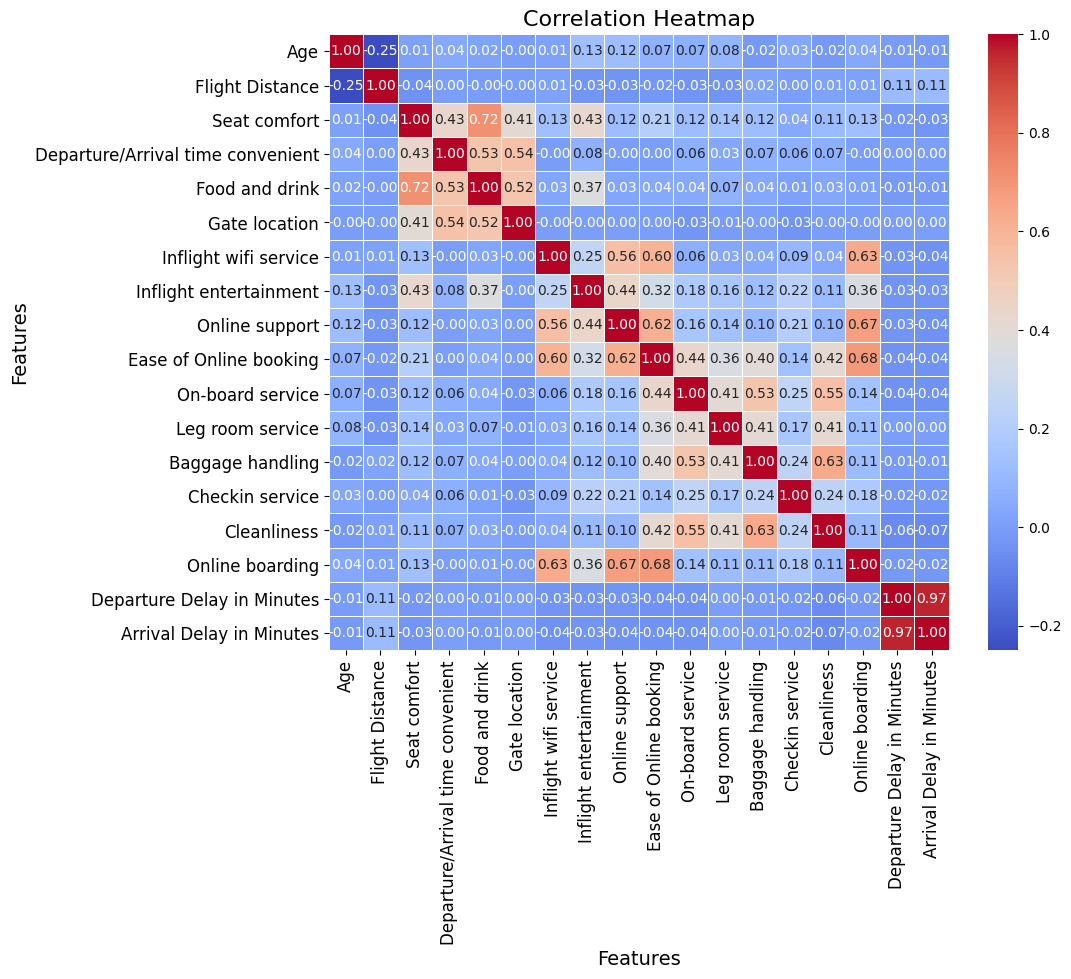

In [16]:
plt.figure(figsize=(10, 8))
sns.heatmap(num_df.corr(),annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlabel('Features', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.title('Correlation Heatmap', fontsize=16)


# Data Preprocessing

In [17]:
# Label Encoding the categorical features
from sklearn.preprocessing import LabelEncoder
for i in df.select_dtypes(include=['object']):
    le=LabelEncoder()
    df[i]=le.fit_transform(df[i])

In [19]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [20]:
# Splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=43)

print("Shape of X_train:", x_train.shape)
print("Shape of X_test:", x_test.shape)


Shape of X_train: (103589, 22)
Shape of X_test: (25898, 22)


In [21]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

# Fitting the model

In [22]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [23]:
svc=SVC()
svc.fit(x_train_scaled,y_train)

SVC()

In [24]:
y_pred=svc.predict(x_test_scaled)

In [25]:
print('Model accuracy : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy : 0.947


<Axes: >

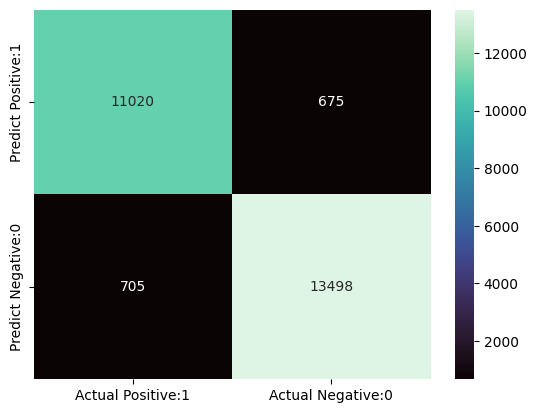

In [26]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [27]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     11695
           1       0.95      0.95      0.95     14203

    accuracy                           0.95     25898
   macro avg       0.95      0.95      0.95     25898
weighted avg       0.95      0.95      0.95     25898



# Testing on other SVM kernel functions

In [ ]:
# # Apply SVM model using Linear Kernel function 
# linear_classifier=SVC(kernel='linear').fit(x_train,y_train)
# y_pred = linear_classifier.predict(x_test)
# print('Model accuracy with linear kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

In [ ]:
# # Apply SVM model using Gaussian RBF kernel function 
# rbf_svc=SVC(kernel='rbf').fit(x_train,y_train)
# y_pred = rbf_svc.predict(x_test)
# print('Model accuracy with rbf kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

In [ ]:
# # Apply SVM model using Polynomial Kernel function
# Poly_svc=SVC(kernel='poly', C=1).fit(x_train,y_train)
# y_pred = Poly_svc.predict(x_test)
# print('Model accuracy with rbf kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

In [ ]:
# # Apply SVM model using Sigmoid Kernel function
# Poly_svc=SVC(kernel='sigmoid', C=1).fit(x_train,y_train)
# y_pred = Poly_svc.predict(x_test)
# print('Model accuracy with rbf kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))